# Problem 1: Linear Regression


## You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

### Data Dictionary:
Variable Name : Description

Carat : Carat weight of the cubic zirconia.

Cut : Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color : Colour of the cubic zirconia.With D being the best and J the worst.

Clarity : cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

X : Length of the cubic zirconia in mm.

Y : Width of the cubic zirconia in mm.

Z : Height of the cubic zirconia in mm.

## Load the Data

In [189]:
gem_df = pd.read_csv("cubic_zirconia.csv")
gem_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Basic Data Exploration
### In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:
### head of the dataset
### shape of the dataset
### info of the dataset
### summary of the dataset

In [190]:
gem_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [191]:
gem_df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [192]:
gem_df.shape

(26967, 11)

In [193]:
# There are 26967 rows and 11 columns. But Unnamed column is non essential which should be dropped.

In [194]:
gem_df = gem_df.drop("Unnamed: 0",axis = 1)
gem_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [195]:
# The unnamed is non essential column therefore we have dropped  it. 

In [196]:
gem_df.shape

(26967, 10)

In [197]:
# There are 26967 rows and 10 columns

In [198]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [199]:
# Inference
# Price is the target variable. The data type is int
# Cut, colour and clarity are object
# carat, depth, table , x , y and z are float.
# depth has many missing values while other columns have 26967 non null values.
# Memory usage is 2.3+MB

In [200]:
round(gem_df.describe(include= "all").T,2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [201]:

#Inference:
# price:
# price (326--18,818). This is the target column containing tags for the features.The magnitude of price is highest.
# The STD is 4024.86
# Mean is 3939.51 and median is 2375. 

# depth:
# The minimum Height of a cubic zirconia: 50.8
# The STD is 1.41 
# Mean Height of a cubic zirconia:61.745 and Median is 61.8 Therefore it is normally distributed. 

# Min value of "x", "y", "z" is zero
#Carat:
#Minimum Carat weight of the cubic zirconia is 0.200000
#Maximum Carat weight of the cubic zirconia is 4.500000
#The magnitude of carat is very less
# STD is 0.47 , mean is 0.79 and median is 0.7




## Check for duplicate data

In [202]:
gem_df.duplicated().sum()

34

In [203]:
print('Before',gem_df.shape)
gem_df.drop_duplicates(inplace=True) 
print('After',gem_df.shape)

Before (26967, 10)
After (26933, 10)


## Check for missing values

In [204]:
gem_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [205]:
#Inference: depth has 697 missing values

## DATA VISUALIZATION

### unique values for categorical variables

In [206]:
for column in gem_df.columns:
    if gem_df[column].dtype == 'object':
        print(column.upper(),': ',gem_df[column].nunique())
        print(gem_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




## BARPLOT OF CUT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


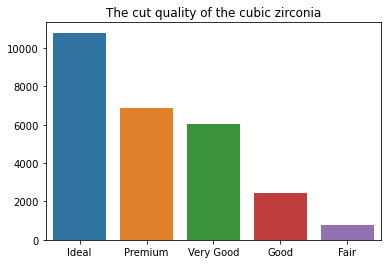

Ideal        0.401181
Premium      0.255671
Very Good    0.223778
Good         0.090410
Fair         0.028961
Name: cut, dtype: float64


In [207]:
sns.barplot(gem_df.cut.value_counts().index,gem_df.cut.value_counts().values)
plt.title("The cut quality of the cubic zirconia")
plt.show()
print(gem_df.cut.value_counts(normalize=True))

In [208]:
# Inference: Ideal is 40%, premium is 25%, Very good is 22% , good is 0.09% and fair is 0.02. Here Ideal is higher grade cut and Fair is lower grade cut. 

## BARPLOT OF COLOUR

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


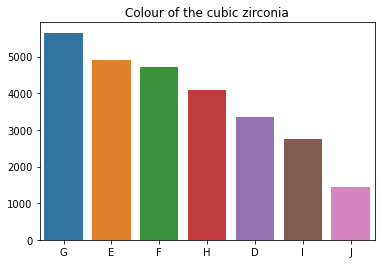

G    0.209891
E    0.182527
F    0.175361
H    0.152044
D    0.124049
I    0.102662
J    0.053466
Name: color, dtype: float64


In [209]:
sns.barplot(gem_df.color.value_counts().index,gem_df.color.value_counts().values)
plt.title("Colour of the cubic zirconia")
plt.show()
print(gem_df.color.value_counts(normalize=True))

In [210]:
# Inference: G is the most significant colour. E, F and H also play an important role while J is least

## BARPLOT OF CLARITY

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


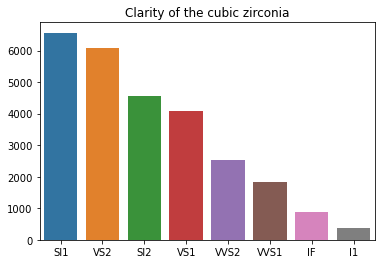

SI1     0.243753
VS2     0.226228
SI2     0.169458
VS1     0.151747
VVS2    0.093937
VVS1    0.068281
IF      0.033082
I1      0.013515
Name: clarity, dtype: float64


In [211]:
sns.barplot(gem_df.clarity.value_counts().index,gem_df.clarity.value_counts().values)
plt.title("Clarity of the cubic zirconia")
plt.show()
print(gem_df.clarity.value_counts(normalize=True))

In [212]:
# Inference: Clarity of SI1 is maximum 24% and I1 is least 0.01 %

## Univariate Analysis: Numerical columns

In [213]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(gem_df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(gem_df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=gem_df[column])
    plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


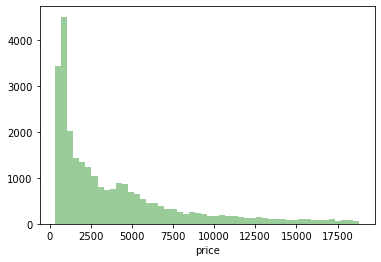

BoxPlot of price
----------------------------------------------------------------------------


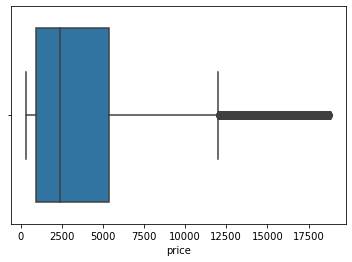

In [214]:
univariateAnalysis_numeric('price',20)

### Central Value of Feature Price

In [215]:
#Central values 
print('Minimum price: ', gem_df['price'].min())
print('Maximum price: ',gem_df['price'].max())
print('Mean value: ', gem_df['price'].mean())
print('Median value: ',gem_df['price'].median())
print('Standard deviation: ', gem_df['price'].std())
print('Null values: ',gem_df['price'].isnull().any())
print('Range of values: ', gem_df['price'].max()- gem_df['price'].min())
print("Skew:",gem_df['price'].skew())


Minimum price:  326
Maximum price:  18818
Mean value:  3937.526120372777
Median value:  2375.0
Standard deviation:  4022.5518622618383
Null values:  False
Range of values:  18492
Skew: 1.6191155261542616


In [216]:
#Quartiles
from scipy import stats
Q1=gem_df['price'].quantile(q=0.25)
Q3=gem_df['price'].quantile(q=0.75)
print('price - 1st Quartile (Q1) is: ', Q1)
print('price - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of price is ', stats.iqr(gem_df['price']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in price: ', L_outliers)
print('Upper outliers in price: ', U_outliers)

price - 1st Quartile (Q1) is:  945.0
price - 3st Quartile (Q3) is:  5356.0
Interquartile range (IQR) of price is  4411.0
Lower outliers in price:  -5671.5
Upper outliers in price:  11972.5


In [217]:
print('Number of outliers in price upper: ', gem_df[gem_df['price']> 0]['price'].count())
print('Number of outliers in price lower: ', gem_df[gem_df['price']<0]['price'].count())
print('% of Outlier in price upper: ',round(gem_df[gem_df['price']> 0]['price'].count()*100/len(gem_df)), '%')
print('% of Outlier in price lower: ',round(gem_df[gem_df['price']<0]['price'].count()*100/len(gem_df)), '%')

Number of outliers in price upper:  26933
Number of outliers in price lower:  0
% of Outlier in price upper:  100 %
% of Outlier in price lower:  0 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


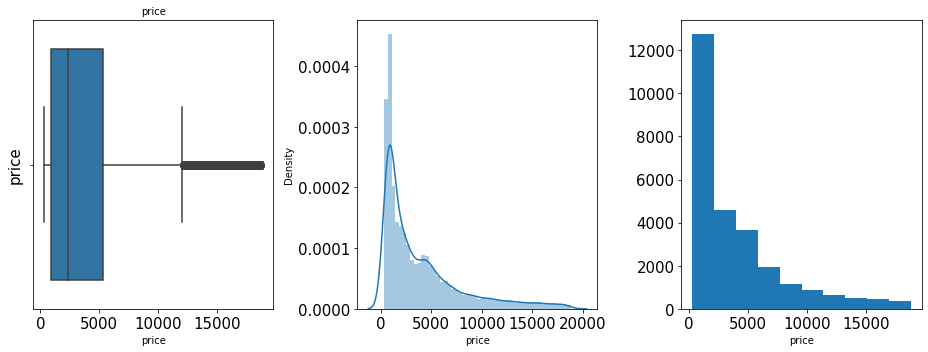

In [218]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='price',data=gem_df,orient='v',ax=ax1)
ax1.set_ylabel('price', fontsize=15)
ax1.set_title('price' , fontsize=10)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(gem_df['price'],ax=ax2)
ax2.set_xlabel('price', fontsize=10)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(gem_df['price'])
ax3.set_xlabel('price', fontsize=10)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [219]:
# Inference: Price has high magnitude and many outliers. It is right skewed. 

### Central Value of Feature Carat

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


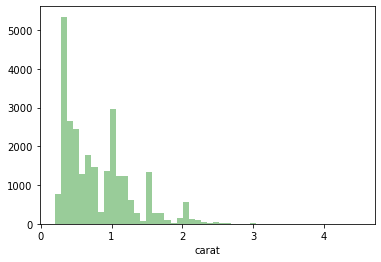

BoxPlot of carat
----------------------------------------------------------------------------


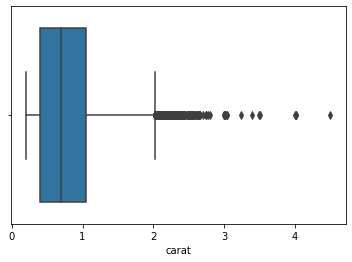

In [220]:
univariateAnalysis_numeric('carat',20)

In [221]:
#Central values 
print('Minimum carat: ', gem_df['carat'].min())
print('Maximum carat: ',gem_df['carat'].max())
print('Mean value: ', gem_df['carat'].mean())
print('Median value: ',gem_df['carat'].median())
print('Standard deviation: ', gem_df['carat'].std())
print('Null values: ',gem_df['carat'].isnull().any())
print('Range of values: ', gem_df['carat'].max()- gem_df['carat'].min())
print("Skew:",gem_df['carat'].skew())


Minimum carat:  0.2
Maximum carat:  4.5
Mean value:  0.7980102476515696
Median value:  0.7
Standard deviation:  0.47723712670603413
Null values:  False
Range of values:  4.3
Skew: 1.114789102547177


In [222]:
Q1=gem_df['carat'].quantile(q=0.25)
Q3=gem_df['carat'].quantile(q=0.75)
print('carat - 1st Quartile (Q1) is: ', Q1)
print('carat - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of carat is ', stats.iqr(gem_df['carat']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in carat: ', L_outliers)
print('Upper outliers in carat: ', U_outliers)

carat - 1st Quartile (Q1) is:  0.4
carat - 3st Quartile (Q3) is:  1.05
Interquartile range (IQR) of carat is  0.65
Lower outliers in carat:  -0.5750000000000001
Upper outliers in carat:  2.0250000000000004


In [223]:
print('Number of outliers in carat upper: ', gem_df[gem_df['carat']> 0]['carat'].count())
print('Number of outliers in carat lower: ', gem_df[gem_df['carat']<0]['carat'].count())
print('% of Outlier in carat upper: ',round(gem_df[gem_df['carat']> 0]['carat'].count()*100/len(gem_df)), '%')
print('% of Outlier in carat lower: ',round(gem_df[gem_df['carat']<0]['carat'].count()*100/len(gem_df)), '%')

Number of outliers in carat upper:  26933
Number of outliers in carat lower:  0
% of Outlier in carat upper:  100 %
% of Outlier in carat lower:  0 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


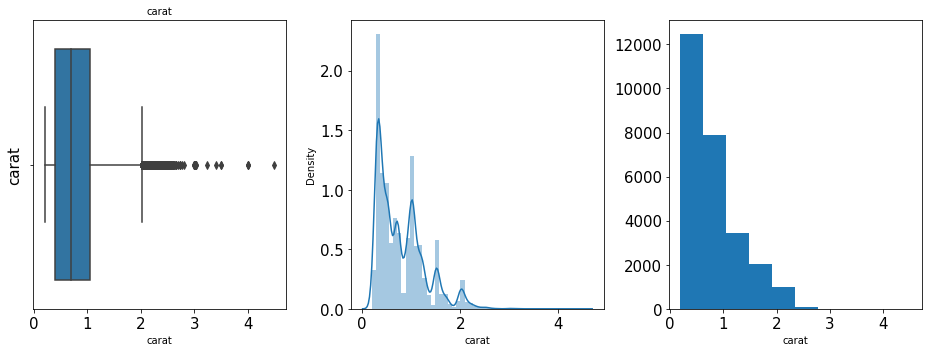

In [224]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='carat',data=gem_df,orient='v',ax=ax1)
ax1.set_ylabel('carat', fontsize=15)
ax1.set_title('carat' , fontsize=10)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(gem_df['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=10)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(gem_df['carat'])
ax3.set_xlabel('carat', fontsize=10)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


## Central Value of Feature Depth

In [225]:
#Central values 
print('Minimum depth: ', gem_df['depth'].min())
print('Maximum depth: ',gem_df['depth'].max())
print('Mean value: ', gem_df['depth'].mean())
print('Median value: ',gem_df['depth'].median())
print('Standard deviation: ', gem_df['depth'].std())
print('Null values: ',gem_df['depth'].isnull().any())
print('Range of values: ', gem_df['depth'].max()- gem_df['depth'].min())
print("Skew:",gem_df['depth'].skew())


Minimum depth:  50.8
Maximum depth:  73.6
Mean value:  61.745285104437116
Median value:  61.8
Standard deviation:  1.4122425692565788
Null values:  True
Range of values:  22.799999999999997
Skew: -0.026085960544075602


In [226]:
Q1=gem_df['depth'].quantile(q=0.25)
Q3=gem_df['depth'].quantile(q=0.75)
print('depth - 1st Quartile (Q1) is: ', Q1)
print('depth - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of depth is ', stats.iqr(gem_df['depth']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in depth: ', L_outliers)
print('Upper outliers in depth: ', U_outliers)

depth - 1st Quartile (Q1) is:  61.0
depth - 3st Quartile (Q3) is:  62.5
Interquartile range (IQR) of depth is  nan
Lower outliers in depth:  58.75
Upper outliers in depth:  64.75


In [227]:
print('Number of outliers in depth upper: ', gem_df[gem_df['depth']> 0]['depth'].count())
print('Number of outliers in depth lower: ', gem_df[gem_df['depth']<0]['depth'].count())
print('% of Outlier in depth upper: ',round(gem_df[gem_df['depth']> 0]['depth'].count()*100/len(gem_df)), '%')
print('% of Outlier in depth lower: ',round(gem_df[gem_df['depth']<0]['depth'].count()*100/len(gem_df)), '%')

Number of outliers in depth upper:  26236
Number of outliers in depth lower:  0
% of Outlier in depth upper:  97 %
% of Outlier in depth lower:  0 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


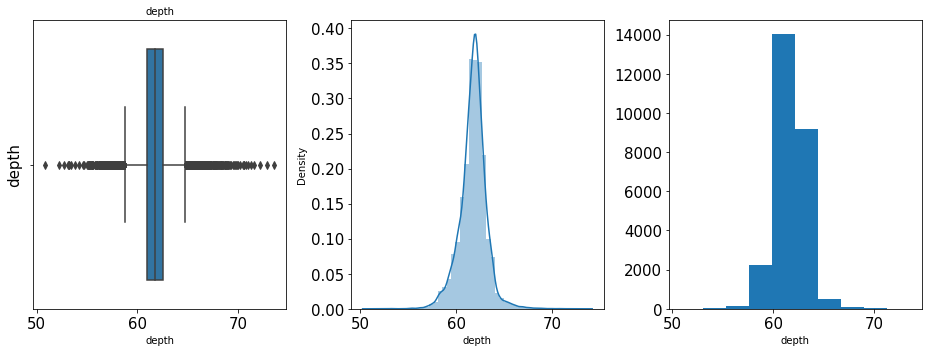

In [228]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='depth',data=gem_df,orient='v',ax=ax1)
ax1.set_ylabel('depth', fontsize=15)
ax1.set_title('depth' , fontsize=10)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(gem_df['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=10)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(gem_df['depth'])
ax3.set_xlabel('depth', fontsize=10)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [229]:
# We can see hitogram and boxplot of all the numerical columns below

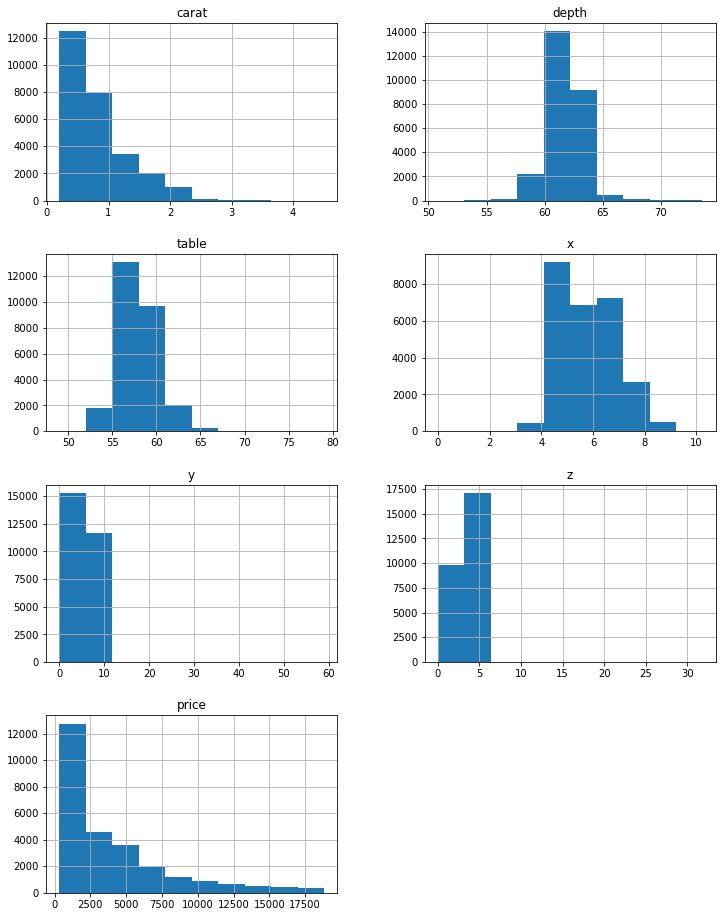

In [230]:
gem_df.hist(figsize=(12,16),layout=(4,2));

<AxesSubplot:>

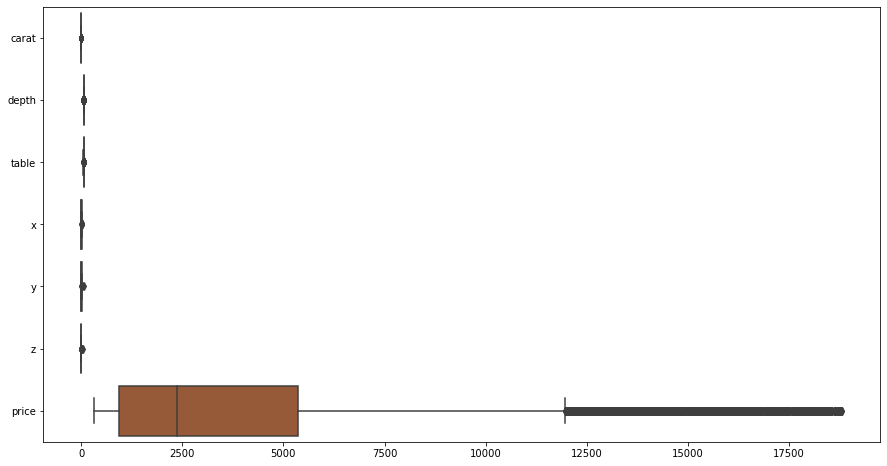

In [231]:
plt.figure(figsize=(15,8))
sns.boxplot(data=gem_df, orient="h", palette="Set1")

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Color Vs Price')

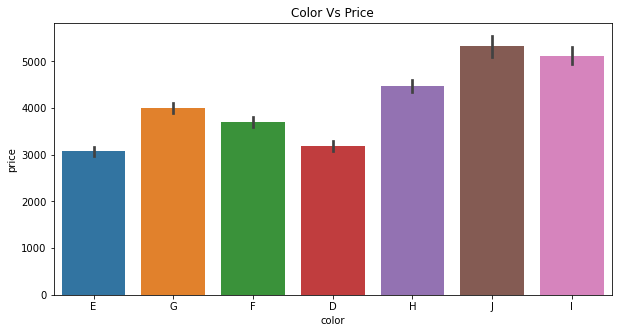

In [232]:
#Bivariate Analysis

plt.figure(figsize=(10,5))
ax = sns.barplot(x='color', y='price',data=gem_df)
plt.title("Color Vs Price")

In [233]:
# Colour J is sold at the highest price. followed by I and H
# Colour D is sold at the lowest Price

Text(0.5, 1.0, 'Cut Vs Price')

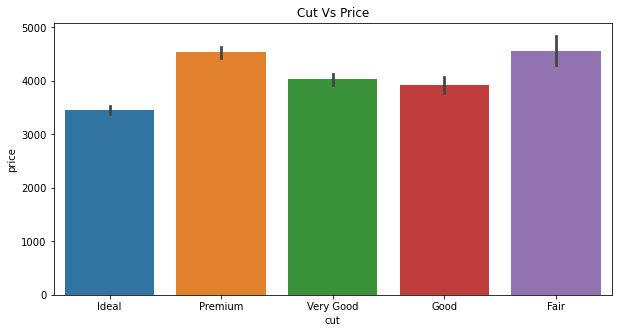

In [234]:
#Cut Vs Price
plt.figure(figsize=(10,5))
ax = sns.barplot(x='cut', y='price',data=gem_df)
plt.title("Cut Vs Price")

In [235]:
# Inference
# "Premium" and " Fair" category is higly sold diamond
#  "Ideal" is high grade diamond is sold less 

Text(0.5, 1.0, 'Clarity Vs Price')

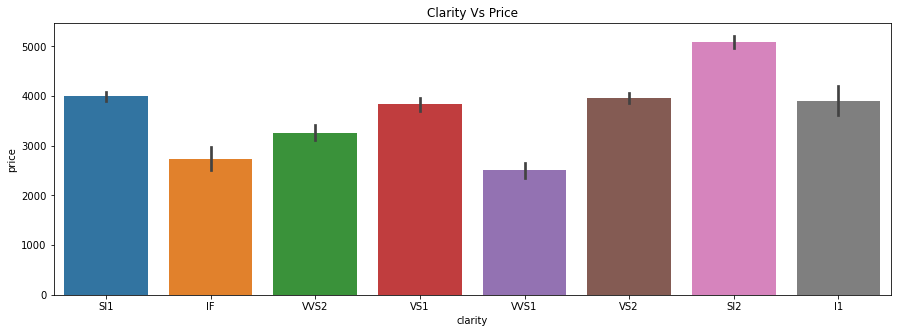

In [236]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='clarity', y='price',data=gem_df)
plt.title("Clarity Vs Price")

In [237]:
# Inference: 
# •SI2 is sold at the highest price. 
# •WS1 and IF are sold at the lowest Price. 



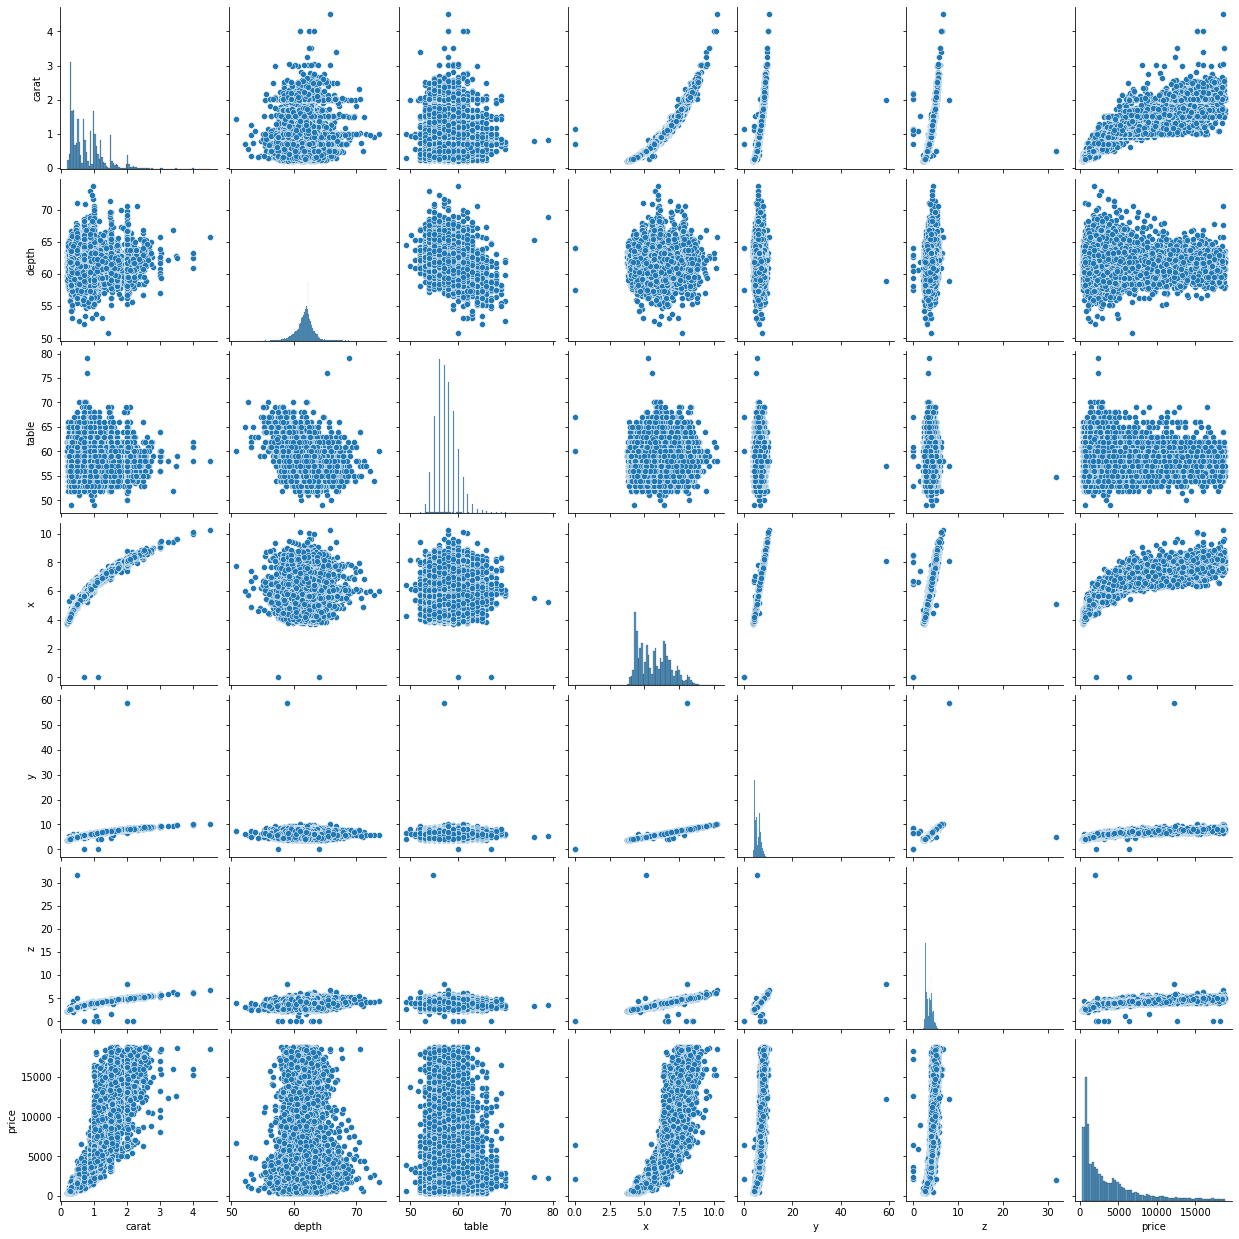

In [238]:
sns.pairplot(gem_df)

In [239]:
# Inference
# Price and carat has linear relationship .other varibales are either slight or no linear relationship seen 
# Looks like only "x" variable is normally distributed
# Other varibales are skewed

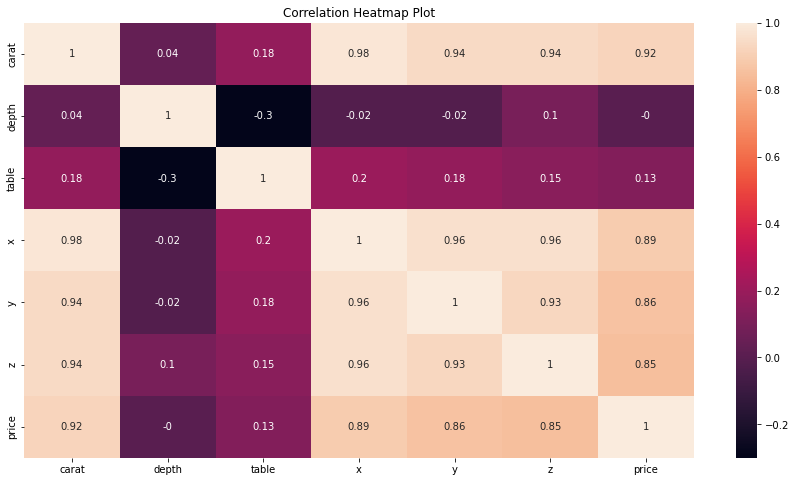

In [240]:
plt.figure(figsize=(15,8))
sns.heatmap(round(gem_df.corr(),2), annot=True);
plt.title('Correlation Heatmap Plot')
plt.show()

In [241]:
# Inference: 
#     Price has high positive corelation with carat, x, y and z
#     Carat has high positive corelation with price, x, y and z
#     This show that carat is important feature for dependent variable price. 
#     x,y and z are correlated
#     depth and table have negative corelation. 

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

## Check for missing values

In [242]:
gem_df.isnull().sum()  

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [243]:
mean = gem_df['depth'].mean()
gem_df["depth"] = gem_df["depth"].fillna(mean)    
        
gem_df.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [244]:
# Depth had 697 missing values. Now it is imputed with mean. 

In [245]:
# Grouping Very Good and good because they have similar relationship with price.  

In [246]:
gem_df['cut']=np.where(gem_df['cut'] =='Good', 'Very Good', gem_df['cut'])

In [247]:
gem_df['cut'].value_counts()

Ideal        10805
Very Good     8462
Premium       6886
Fair           780
Name: cut, dtype: int64

Text(0.5, 1.0, 'Cut Vs Price')

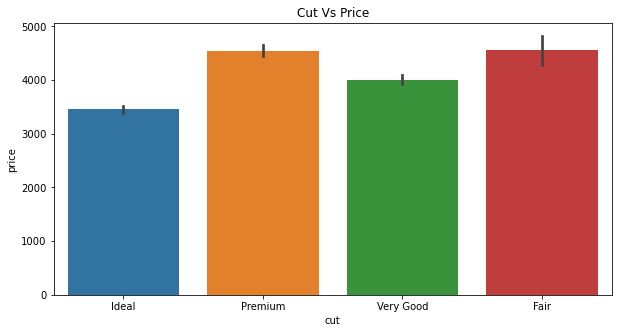

In [248]:
#Cut Vs Price
plt.figure(figsize=(10,5))
ax = sns.barplot(x='cut', y='price',data=gem_df)
plt.title("Cut Vs Price")

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [249]:
gem_df['cut']=np.where(gem_df['cut'] =='Very Good', 'verygood', gem_df['cut'])

In [250]:
gem_df = pd.get_dummies(gem_df, columns=['clarity',"cut","color"],drop_first=True)

In [251]:
#Dummy coding is mainly used for including nominal and ordinal variables in linear regression analysis. 
# Using get_dummies ,all categorical variables are converted into Dummy-coded data 
# get_dummies is used,because of ordinal variables in categorical

In [252]:
gem_df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,clarity_VVS2,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [253]:
# get_dummies: Convert categorical variable into dummy/indicator variables.Dummy coding is mainly used for including nominal and ordinal variables in linear regression analysis. Since such variables don't have a fixed unit of measurement, assuming a linear relation between them and an outcome variable doesn't make sense.
# Using get_dummies ,all categorical variables are converted into Dummy-coded data 

In [254]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26933 non-null  float64
 1   depth         26933 non-null  float64
 2   table         26933 non-null  float64
 3   x             26933 non-null  float64
 4   y             26933 non-null  float64
 5   z             26933 non-null  float64
 6   price         26933 non-null  int64  
 7   clarity_IF    26933 non-null  uint8  
 8   clarity_SI1   26933 non-null  uint8  
 9   clarity_SI2   26933 non-null  uint8  
 10  clarity_VS1   26933 non-null  uint8  
 11  clarity_VS2   26933 non-null  uint8  
 12  clarity_VVS1  26933 non-null  uint8  
 13  clarity_VVS2  26933 non-null  uint8  
 14  cut_Ideal     26933 non-null  uint8  
 15  cut_Premium   26933 non-null  uint8  
 16  cut_verygood  26933 non-null  uint8  
 17  color_E       26933 non-null  uint8  
 18  color_F       26933 non-nu

In [255]:
#DataFrame Scaling
from scipy.stats import zscore
gem_df_scaled = gem_df.apply(zscore)
gem_df_scaled.head(10)

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,clarity_VVS2,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.043547,0.254491,0.243737,-1.294498,-1.238697,-1.219208,-0.854828,-0.184970,1.761395,-0.451699,...,-0.321987,1.221737,-0.586083,-0.676848,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
1,-0.980684,-0.678196,0.243737,-1.161442,-1.092777,-1.163648,-0.734256,5.406277,-0.567732,-0.451699,...,-0.321987,-0.818506,1.706244,-0.676848,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
2,0.213713,0.326236,1.139749,0.275562,0.332097,0.336455,0.584584,-0.184970,-0.567732,-0.451699,...,3.105713,-0.818506,-0.586083,1.477436,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
3,-0.792095,-0.104235,-0.652274,-0.806626,-0.800935,-0.802512,-0.709892,-0.184970,-0.567732,-0.451699,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668
4,-1.022593,-0.965177,0.691743,-1.223534,-1.118527,-1.233097,-0.785219,-0.184970,-0.567732,-0.451699,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668
5,0.465165,-0.175980,-0.652274,0.648119,0.649689,0.628141,1.383345,-0.184970,-0.567732,-0.451699,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
6,0.444210,1.402413,1.139749,0.550544,0.486601,0.683701,0.223363,-0.184970,1.761395,-0.451699,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,-0.515411,2.361577,-0.338242,-0.237668
7,-0.624461,-0.175980,2.035760,-0.567125,-0.577762,-0.580275,-0.627108,-0.184970,1.761395,-0.451699,...,-0.321987,-0.818506,1.706244,-0.676848,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
8,0.863297,1.474158,2.931771,0.878749,0.769859,1.003167,0.365316,-0.184970,1.761395,-0.451699,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,-0.515411,2.361577,-0.338242,-0.237668
9,-0.938776,-0.893432,-0.204268,-1.072738,-0.972607,-1.080309,-0.803367,-0.184970,-0.567732,-0.451699,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668


### Train-Test Split

In [256]:

X = gem_df_scaled.drop('price', axis=1)

y = gem_df_scaled[['price']]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [258]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (18853, 22)
The training set for the dependent variable: (18853, 1)
The test set for the independent variables: (8080, 22)
The test set for the dependent variable: (8080, 1)


In [259]:
X_train.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,clarity_VVS2,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
22114,-0.959730,0.469726,1.139749,-1.170312,-1.109944,-1.080309,-0.18497,-0.567732,-0.451699,-0.422958,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,-0.515411,2.361577,-0.338242,-0.237668
2275,-1.043547,-0.391216,-1.100279,-1.223534,-1.221530,-1.233097,-0.18497,-0.567732,-0.451699,-0.422958,...,-0.321987,1.221737,-0.586083,-0.676848,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
19183,-0.624461,0.541471,-0.204268,-0.567125,-0.586346,-0.510826,-0.18497,1.761395,-0.451699,-0.422958,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
5030,0.632799,1.115432,-0.652274,0.710212,0.726942,0.850379,-0.18497,-0.567732,2.213862,-0.422958,...,-0.321987,-0.818506,-0.586083,1.477436,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668
25414,0.465165,-0.462961,2.035760,0.719082,0.649689,0.614251,-0.18497,-0.567732,2.213862,-0.422958,...,-0.321987,-0.818506,1.706244,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668


In [260]:
X_test.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,clarity_VVS2,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
16997,0.968069,-0.893432,2.035760,1.100509,1.018783,0.919828,-0.18497,1.761395,-0.451699,-0.422958,...,-0.321987,-0.818506,1.706244,-0.676848,-0.472527,-0.461142,-0.515411,-0.423446,2.956465,-0.237668
24457,0.213713,-2.328335,0.691743,0.550544,0.538103,0.253116,-0.18497,-0.567732,-0.451699,-0.422958,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
16612,1.198566,-1.539138,-0.204268,1.375491,1.276290,1.086506,-0.18497,-0.567732,-0.451699,2.364301,...,-0.321987,1.221737,-0.586083,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668
308,0.087987,1.330668,-0.204268,0.222340,0.169009,0.350344,-0.18497,-0.567732,-0.451699,2.364301,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668
26652,2.518689,-0.678196,2.035760,2.093993,2.048812,1.933786,-0.18497,-0.567732,-0.451699,-0.422958,...,-0.321987,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,-0.515411,-0.423446,-0.338242,4.207549


In [261]:
y_train.head()

,price
22114,-0.845381
2275,-0.769060
19183,-0.670613
5030,0.031690
25414,0.029702


In [262]:
y_test.head()

,price
16997,0.336726
24457,0.135855
16612,1.917096
308,-0.154513
26652,2.263648


In [263]:
#spilting the dataset into train and test set to build Linear regression model (70:30)
# X_train :70% of data randomly chosen from the 23 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 23 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "price" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "price" columns.These are test ndependent variables

## Using Linear Model from Sklearn library

In [264]:
from sklearn import metrics

In [265]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

## Get the score on training set

In [266]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.365693579138041
The coefficient for depth is -0.02444751994788537
The coefficient for table is -0.01616585218998144
The coefficient for x is -0.3062055669223525
The coefficient for y is -0.0005107155749885185
The coefficient for z is -0.008391995009148365
The coefficient for clarity_IF is 0.23099641414901995
The coefficient for clarity_SI1 is 0.3738866077779197
The coefficient for clarity_SI2 is 0.23469247316923617
The coefficient for clarity_VS1 is 0.3941215660928474
The coefficient for clarity_VS2 is 0.42734016849615974
The coefficient for clarity_VVS1 is 0.30512286588969983
The coefficient for clarity_VVS2 is 0.3501058844200533
The coefficient for cut_Ideal is 0.09408861684561635
The coefficient for cut_Premium is 0.07459448751986383
The coefficient for cut_verygood is 0.0736740634871786
The coefficient for color_E is -0.017954551258334315
The coefficient for color_F is -0.026949681338851606
The coefficient for color_G is -0.04988008179281885
The coeff

In [267]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0005232059171310326


In [268]:
# R square on training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9202496752509196


In [269]:
# R square on testing data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9230815722191751


In [270]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2814869472199742

In [271]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2794242261934047

### Linear Regression using statsmodels

In [272]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J,price
22114,-0.959730,0.469726,1.139749,-1.170312,-1.109944,-1.080309,-0.18497,-0.567732,-0.451699,-0.422958,...,-0.818506,-0.586083,1.477436,-0.472527,-0.461142,-0.515411,2.361577,-0.338242,-0.237668,-0.845381
2275,-1.043547,-0.391216,-1.100279,-1.223534,-1.221530,-1.233097,-0.18497,-0.567732,-0.451699,-0.422958,...,1.221737,-0.586083,-0.676848,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668,-0.769060
19183,-0.624461,0.541471,-0.204268,-0.567125,-0.586346,-0.510826,-0.18497,1.761395,-0.451699,-0.422958,...,1.221737,-0.586083,-0.676848,-0.472527,-0.461142,1.940199,-0.423446,-0.338242,-0.237668,-0.670613
5030,0.632799,1.115432,-0.652274,0.710212,0.726942,0.850379,-0.18497,-0.567732,2.213862,-0.422958,...,-0.818506,-0.586083,1.477436,2.116280,-0.461142,-0.515411,-0.423446,-0.338242,-0.237668,0.031690
25414,0.465165,-0.462961,2.035760,0.719082,0.649689,0.614251,-0.18497,-0.567732,2.213862,-0.422958,...,-0.818506,1.706244,-0.676848,-0.472527,2.168529,-0.515411,-0.423446,-0.338242,-0.237668,0.029702


In [273]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'cut_Ideal', 'cut_Premium', 'cut_verygood', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'price'],
      dtype='object')

In [274]:
expr= 'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ depth + table + x + y + z'
expr

'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ depth + table + x + y + z'

In [275]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()# OLS : ORDINARY LEAST SQ 
lm1.params

Intercept       0.000523
clarity_IF      0.230996
clarity_SI1     0.373887
clarity_SI2     0.234692
clarity_VS1     0.394122
clarity_VS2     0.427340
clarity_VVS1    0.305123
clarity_VVS2    0.350106
cut_Ideal       0.094089
cut_Premium     0.074594
cut_verygood    0.073674
color_E        -0.017955
color_F        -0.026950
color_G        -0.049880
color_H        -0.089843
color_I        -0.114623
color_J        -0.134416
carat           1.365694
depth          -0.024448
table          -0.016166
x              -0.306206
y              -0.000511
z              -0.008392
dtype: float64

In [276]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9876.
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:46:26   Log-Likelihood:                -2851.9
No. Observations:               18853   AIC:                             5750.
Df Residuals:                   18830   BIC:                             5930.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0005      0.002      0.255   

In [277]:

# Inference:
# P >|t| is your p-value. A p-value of less than 0.05 is statistically significant expect y ,all other variables have p-value of less than 0.05 is considered to be statistically significant
# Adjusted R squared and R Squared both are 0.92
# Standard error is very low
# Carat has the highest coefficient


In [278]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

0.07923490145522014

In [279]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.28148694721997347

In [280]:
# Prediction on Test data
y_pred = lm1.predict(data_test)
y_pred

16997    0.661178
24457    0.255458
16612    1.497673
308      0.185780
26652    2.378772
           ...   
25016   -0.681566
8485     0.582945
26891    0.250166
17455    0.172768
26169    0.237044
Length: 8080, dtype: float64

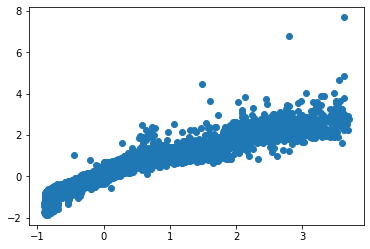

In [281]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [282]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.23) * clarity_IF + (0.37) * clarity_SI1 + (0.23) * clarity_SI2 + (0.39) * clarity_VS1 + (0.43) * clarity_VS2 + (0.31) * clarity_VVS1 + (0.35) * clarity_VVS2 + (0.09) * cut_Ideal + (0.07) * cut_Premium + (0.07) * cut_verygood + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.11) * color_I + (-0.13) * color_J + (1.37) * carat + (-0.02) * depth + (-0.02) * table + (-0.31) * x + (-0.0) * y + (-0.01) * z + 

In [ ]:
# Cubic Zirconia is a colourless, synthetic gemstone made of the cubic crystalline form of zirconium oxide. Often called as an inexpensive diamond or look like diamond. It is significantly cheaper than diamonds.
# Like Diamonds, “4C” (Cut, Color, Clarity and Carat) play vital role in deciding the price of the gemstone. After Analysing and predicting using linear Regression in Cubic_Zicornia dataset, it seems Carat is a particularly important attribute to decide the price of the gemstone.
# If the Carat increases, the price of the gemstone increases. The coeff of carat is the highest. Second important attribute is clarity. Colour J is sold at the highest price. followed by I and H. Colour D is sold at the lowest Price. depth and table are weak predictors and has no impact on the predictions.
# Recommendation
# I recommend the company to concentrate mainly on carat while deciding the price of the Cubic Zirconia gemstone. So, Carat helps us to differentiate the higher and lower profitable stones. This will improve the profit of the company.


